In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [3]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We will use the One-Hot-Encoding method to convert the cathegorical features that have multiple values into numerical and the label encoder for the cathegorical features that only have two values

In [5]:
#One hot encoding
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 
                                 'OnlineBackup', 'Contract', 'PaymentMethod'], drop_first=True)

#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_label_en = ['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV'
,'StreamingMovies', 'PaperlessBilling', 'Churn'
]

for col in columns_label_en:
    df[col] = le.fit_transform(df[col])


In [6]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   DeviceProtection                       7043 non-null   int64  
 9   TechSupport                            7043 non-null   int64  
 10  StreamingTV                            7043 non-null   int64  
 11  Stre

From the encoding we created more features but now they are all numerical and easier to to analyse

In [7]:
from sklearn.preprocessing import StandardScaler

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

C:\Users\david\AppData\Local\Temp\ipykernel_1776\1157477070.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


We use the standardisation method because it is more robust than the normalisation one and it handle outliers pretty well

In [8]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   float64
 6   PhoneService                           7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   DeviceProtection                       7043 non-null   int64  
 9   TechSupport                            7043 non-null   int64  
 10  StreamingTV                            7043 non-null   int64  
 11  Stre

For easier proccessing we also standardised the default numeric values and now we can visulise the data and the feature corelation before we save the csv, so that we can decide if there are features that could be dropped without affecting our proccess

In [9]:
df = df.drop('customerID',axis=1)
#we can drop customerID from the start because it can just confuse some models and they may find a correlation when in reality there isnt one

In [13]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,0,0,0,0,0,1,-1.160323,-0.994971,0,True,False,False,False,False,True,False,False,False,True,False
1,1,0,0,0,0.066327,1,2,2,0,0,0,0,-0.259629,-0.173876,0,False,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,2,0,0,0,0,1,-0.362660,-0.960399,1,False,False,False,False,False,True,False,False,False,False,True
3,1,0,0,0,0.514251,0,2,2,2,0,0,0,-0.746535,-0.195400,0,True,False,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,0,0,0,0,0,1,0.197365,-0.941193,1,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,2,2,2,2,1,0.665992,-0.129281,0,False,True,False,False,False,False,True,False,False,False,True
7039,0,0,1,1,1.613701,1,0,2,0,2,2,1,1.277533,2.242808,0,False,True,True,False,False,True,True,False,True,False,False
7040,0,0,1,1,-0.870241,0,2,0,0,0,0,1,-1.168632,-0.855182,0,True,False,False,False,False,False,False,False,False,True,False
7041,1,1,1,0,-1.155283,1,0,0,0,0,0,1,0.320338,-0.872777,1,False,True,True,False,False,False,False,False,False,False,True


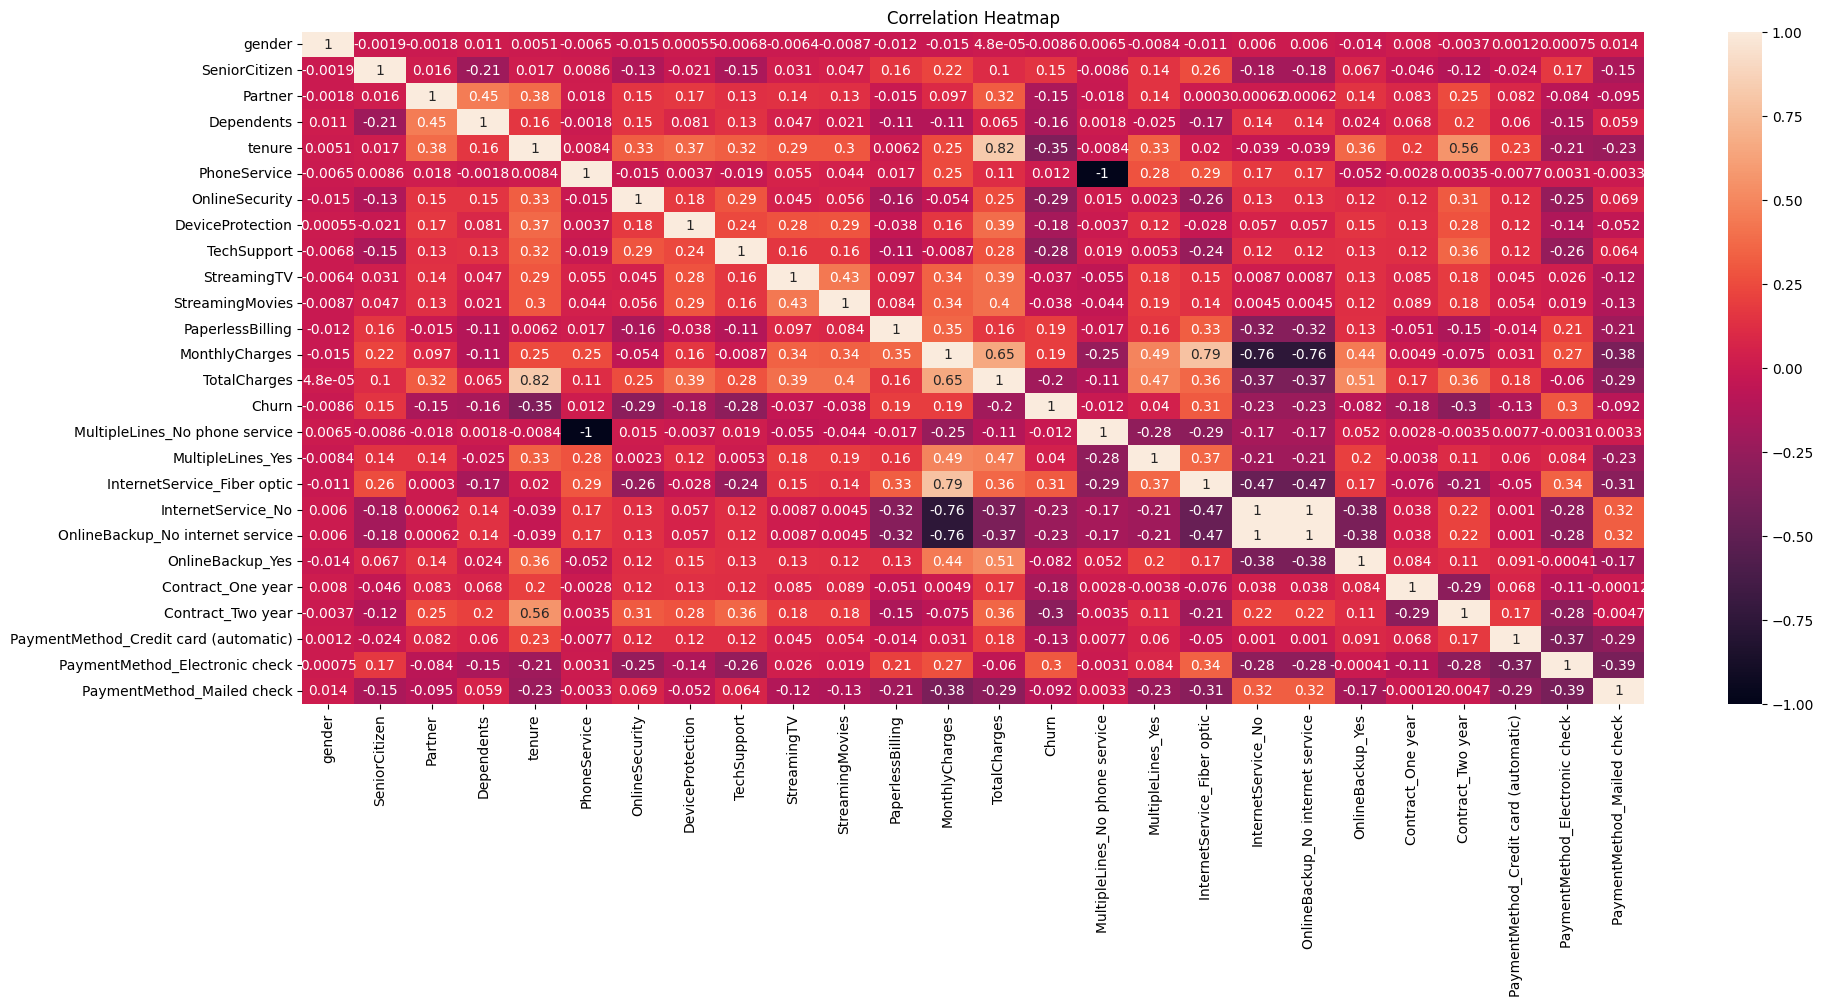

In [11]:
fig = plt.figure(figsize=(20, 10))
correlation_data = df
dataplot = sns.heatmap(correlation_data.corr(), annot=True)
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()

We can see that there isnt a strong correlation between features so that means that we do not have redundant data and since we have analysed the data in full and have done all the nessecery preprocessing we can save it as a separette csv file. Everything done here should be a guidance to create a special py script that will transform any testing data in the nessecery format before the models have a go at it.

In [12]:
#processed data is saved to a different csv
df.to_csv('processed_data.csv',index=False)